In [34]:
import pandas as pd
import numpy as np
import os
import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [17]:
cd '/content/drive/My Drive/Colab Notebooks/road_sign/data/road_sine_ml/data'

/content/drive/My Drive/Colab Notebooks/road_sign/data/road_sine_ml/data


In [0]:
train = pd.read_pickle('train.p')
test = pd.read_pickle('test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1:
  y_train = to_categorical(y_train)

if y_test.ndim == 1:
  y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [21]:
model = Sequential([
                    Conv2D(
                        filters=64,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape),
                    
                    Flatten(),

                    Dense(num_classes, activation='softmax')

])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 8s 7ms/step - loss: 9.6354 - accuracy: 0.8015


In [0]:
def gen_cnn_vl(input_shape, num_classes):
  return Sequential([
                    Conv2D(
                        filters=64,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape),
                    
                    Flatten(),

                    Dense(num_classes, activation='softmax')

  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir= os.path.join("logs", datetime.datetime.now().strftime("%Ym%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  
  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epchos', 5),
      verbose=params_fit.get('verbose',1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks= [tensorboard_callback])
  
  return model

In [23]:
model = gen_cnn_vl(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 6s 24ms/step - loss: 31.9622 - accuracy: 0.7442 - val_loss: 0.2681 - val_accuracy: 0.9402
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2182 - accuracy: 0.9514 - val_loss: 0.1723 - val_accuracy: 0.9645
Epoch 3/5
272/272 [==============================] - 6s 24ms/step - loss: 0.1317 - accuracy: 0.9701 - val_loss: 0.0852 - val_accuracy: 0.9793
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0937 - accuracy: 0.9780 - val_loss: 0.0973 - val_accuracy: 0.9820
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0939 - accuracy: 0.9784 - val_loss: 0.1045 - val_accuracy: 0.9858


In [0]:
df =pd.read_csv('signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
def predict(model_trained, X_test, y_test,scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)
  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [36]:
predict(model_trained, X_test, y_test)

0.8222222222222222

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  
  return predict(model_trained, X_test, y_test)

In [43]:
def gen_cnn_v2(input_shape, num_classes):
  return Sequential([
                    Conv2D(
                        filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(
                        filters=64,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape),
                     
                     MaxPool2D(),
                     Dropout(0.3),
                     
                     Flatten(),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),
                     
                     Dense(num_classes, activation='softmax')

  ])

train_and_predict(gen_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 7s 25ms/step - loss: 5.9992 - accuracy: 0.2701 - val_loss: 1.5201 - val_accuracy: 0.5733
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 1.2640 - accuracy: 0.6329 - val_loss: 0.3972 - val_accuracy: 0.9156
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.5688 - accuracy: 0.8324 - val_loss: 0.1687 - val_accuracy: 0.9681
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.3645 - accuracy: 0.8920 - val_loss: 0.0910 - val_accuracy: 0.9851
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2740 - accuracy: 0.9183 - val_loss: 0.0481 - val_accuracy: 0.9900


0.9294784580498866

In [44]:
def gen_cnn_v3(input_shape, num_classes):
  return Sequential([
                    Conv2D(
                        filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape),
                     Conv2D(
                        filters=32,
                        kernel_size=(3, 3),
                        activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(
                        filters=64,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape),
                     Conv2D(
                        filters=64,
                        kernel_size=(3, 3),
                        activation='relu'),
                     
                     MaxPool2D(),
                     Dropout(0.3),
                     
                     Flatten(),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),
                     
                     Dense(num_classes, activation='softmax')

  ])

train_and_predict(gen_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 10s 38ms/step - loss: 1.8564 - accuracy: 0.5680 - val_loss: 0.4008 - val_accuracy: 0.9239
Epoch 2/5
272/272 [==============================] - 10s 36ms/step - loss: 0.5279 - accuracy: 0.8442 - val_loss: 0.1558 - val_accuracy: 0.9649
Epoch 3/5
272/272 [==============================] - 10s 36ms/step - loss: 0.3519 - accuracy: 0.8911 - val_loss: 0.1342 - val_accuracy: 0.9652
Epoch 4/5
272/272 [==============================] - 10s 36ms/step - loss: 0.2679 - accuracy: 0.9168 - val_loss: 0.0729 - val_accuracy: 0.9849
Epoch 5/5
272/272 [==============================] - 10s 36ms/step - loss: 0.2066 - accuracy: 0.9361 - val_loss: 0.0546 - val_accuracy: 0.9874


0.9442176870748299

In [47]:
def gen_cnn_v4(input_shape, num_classes):
  return Sequential([
                    Conv2D(
                        filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape),
                     Conv2D(
                        filters=32,
                        kernel_size=(3, 3),
                        activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(
                        filters=64,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape,
                        padding='same'),
                     Conv2D(
                        filters=64,
                        kernel_size=(3, 3),
                        activation='relu'),
                     
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(
                        filters=64,
                        kernel_size=(3, 3),
                        activation='relu',
                        padding='same'),
                     Conv2D(
                        filters=64,
                        kernel_size=(3, 3),
                        activation='relu'),
                     
                     MaxPool2D(),
                     Dropout(0.3),
                     
                     Flatten(),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),
                     
                     Dense(num_classes, activation='softmax')

  ])

train_and_predict(gen_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 11s 42ms/step - loss: 2.7091 - accuracy: 0.2970 - val_loss: 1.0194 - val_accuracy: 0.6756
Epoch 2/5
272/272 [==============================] - 11s 40ms/step - loss: 0.8710 - accuracy: 0.7310 - val_loss: 0.2334 - val_accuracy: 0.9432
Epoch 3/5
272/272 [==============================] - 11s 40ms/step - loss: 0.4162 - accuracy: 0.8735 - val_loss: 0.0980 - val_accuracy: 0.9720
Epoch 4/5
272/272 [==============================] - 11s 40ms/step - loss: 0.2535 - accuracy: 0.9236 - val_loss: 0.0440 - val_accuracy: 0.9878
Epoch 5/5
272/272 [==============================] - 11s 40ms/step - loss: 0.1908 - accuracy: 0.9418 - val_loss: 0.0423 - val_accuracy: 0.9882


0.9621315192743765

In [61]:
def gen_cnn_v5(input_shape, num_classes):
  return Sequential([
                    Conv2D(
                        filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape),
                     Conv2D(
                        filters=32,
                        kernel_size=(3, 3),
                        activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(
                        filters=62,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=input_shape,
                        padding='same'),
                     Conv2D(
                        filters=64,
                        kernel_size=(3, 3),
                        activation='relu'),
                     
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(
                        filters=62,
                        kernel_size=(3, 3),
                        activation='relu',
                        padding='same'),
                     Conv2D(
                        filters=62,
                        kernel_size=(3, 3),
                        activation='relu'),
                     
                     MaxPool2D(),
                     Dropout(0.3),
                     
                     Flatten(),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),
                     
                     Dense(num_classes, activation='softmax')

  ])

train_and_predict(gen_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 12s 44ms/step - loss: 2.5830 - accuracy: 0.2945 - val_loss: 1.2407 - val_accuracy: 0.6058
Epoch 2/5
272/272 [==============================] - 12s 42ms/step - loss: 0.9637 - accuracy: 0.6885 - val_loss: 0.2557 - val_accuracy: 0.9257
Epoch 3/5
272/272 [==============================] - 11s 42ms/step - loss: 0.4235 - accuracy: 0.8673 - val_loss: 0.1129 - val_accuracy: 0.9658
Epoch 4/5
272/272 [==============================] - 11s 42ms/step - loss: 0.2568 - accuracy: 0.9211 - val_loss: 0.0471 - val_accuracy: 0.9872
Epoch 5/5
272/272 [==============================] - 11s 42ms/step - loss: 0.1990 - accuracy: 0.9399 - val_loss: 0.0334 - val_accuracy: 0.9910


0.9678004535147392

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

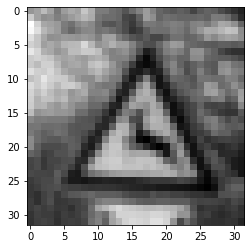

In [66]:
plt.imshow(color.rgb2gray(X_train[230]), cmap=plt.get_cmap('gray'))

In [67]:
model = gen_cnn_v5((32, 32, 1), num_classes )
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 12s 43ms/step - loss: 2.5474 - accuracy: 0.2776 - val_loss: 0.6664 - val_accuracy: 0.7804
Epoch 2/5
272/272 [==============================] - 11s 42ms/step - loss: 0.5340 - accuracy: 0.8257 - val_loss: 0.1225 - val_accuracy: 0.9626
Epoch 3/5
272/272 [==============================] - 11s 42ms/step - loss: 0.2481 - accuracy: 0.9204 - val_loss: 0.0673 - val_accuracy: 0.9797
Epoch 4/5
272/272 [==============================] - 12s 42ms/step - loss: 0.1537 - accuracy: 0.9518 - val_loss: 0.0340 - val_accuracy: 0.9896
Epoch 5/5
272/272 [==============================] - 12s 42ms/step - loss: 0.1270 - accuracy: 0.9604 - val_loss: 0.0200 - val_accuracy: 0.9945


0.982766439909297